# Draw as a line plot

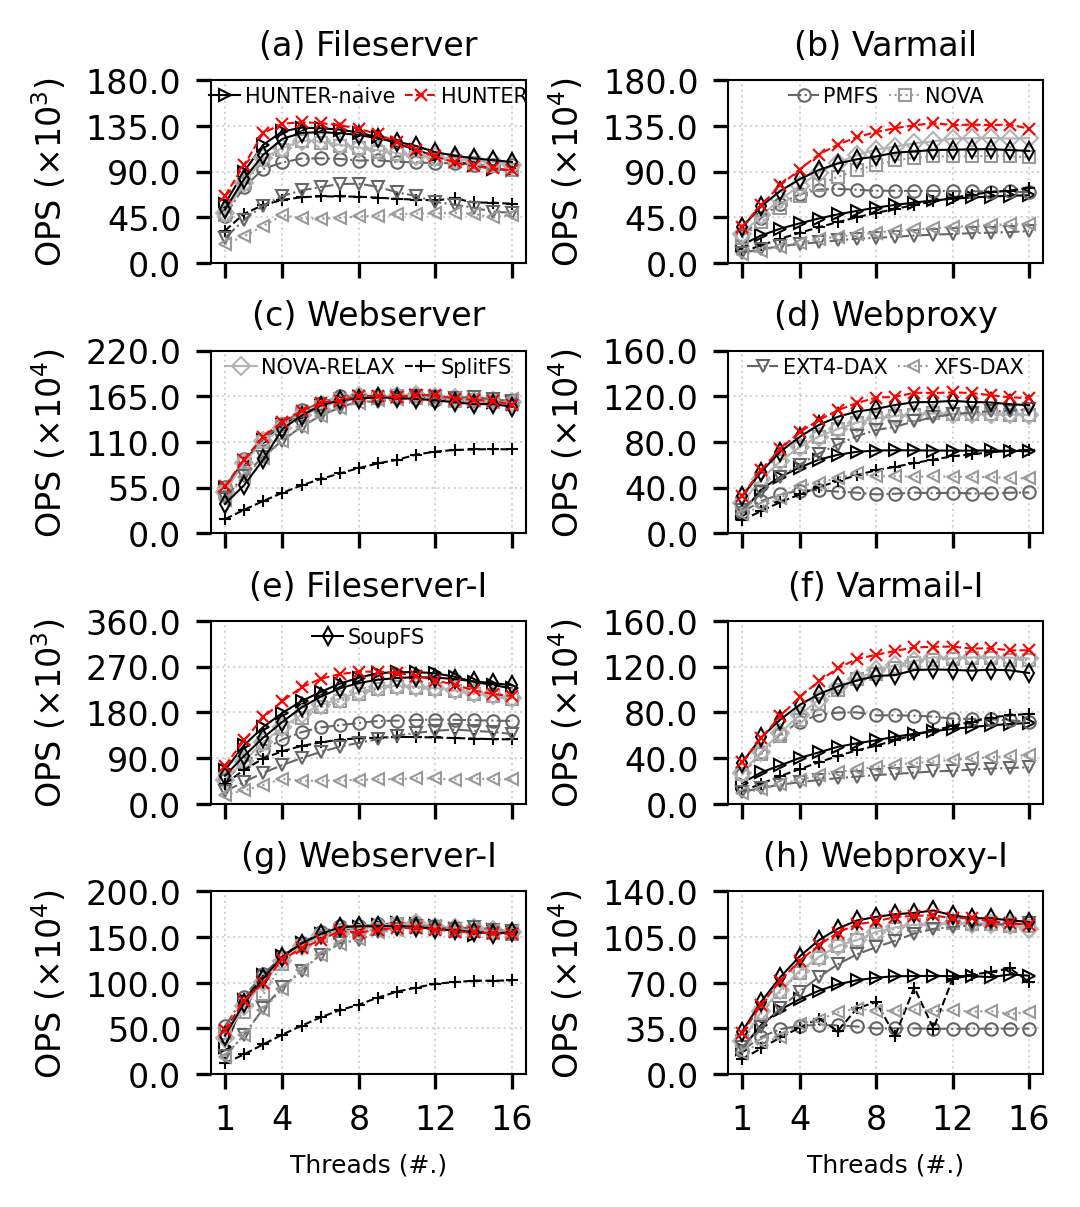

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-interleaved", "r") as f:
    df_int = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(10)))
fig.patch.set_facecolor("white")

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
subtitles = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy", "(e) Fileserver-I", "(f) Varmail-I", "(g) Webserver-I", "(h) Webproxy-I"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = ["fileserver.f", "varmail.f", "webserver.f", "webproxy.f", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
num_jobs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# for thread in num_jobs:
#     for workload in workloads:
#         for df in [df, df_int]:
#             value = df[(df['file_bench'] == workload) & (df['threads'] == thread)]['iops'] / df[(df['file_bench'] == workload) & (df['threads'] == thread)]['iops'].max()
#             df.loc[(df['file_bench'] == workload) & (df['threads'] == thread), 'iops'] = value

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)

units = [
    1000,
    10000,
    10000,
    10000,
    1000,
    10000,
    10000,
    10000,
]

ylims = [
    [0, 180],
    [0, 180],
    [0, 220],
    [0, 160],
    [0, 360],
    [0, 160],
    [0, 200],
    [0, 140],
]


lines = []
cmap = "tab10"
for workload_id, workload in enumerate(workloads):
    subfig = plt.subplot(4, 2, workload_id + 1)
    
    df = df if workload_id < 4 else df_int

    for idx, fs in enumerate(fss):
        if fs == "HUNTER-J":
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['file_bench'] == workload)]['iops'] / units[workload_id], color="red", linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10, markerfacecolor='none')
        elif fs == "SoupFS":
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['file_bench'] == workload)]['iops'] / units[workload_id], linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], markerfacecolor='none', color="black")
        else:
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['file_bench'] == workload)]['iops'] / units[workload_id], linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], markerfacecolor='none')
        lines.append(line)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    # plt.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if workload_id == 0 or workload_id == 1:
    plt.yticks(np.linspace(0, 1, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    # plt.xlabel("Threads (#.)", fontsize=8) 
    # plt.title(subtitles[workload_id], fontsize=8, loc='center')
        
    plt.ylim(ylims[workload_id])
    plt.yticks(np.linspace(0, ylims[workload_id][1], 5), fontsize=8)
    # plt.ylim(0, 1.3)
    plt.title(subtitles[workload_id], fontsize=8)
    if workload_id == 6 or workload_id == 7:
        # context = add_explanation_and_title(fig, subfig, "Threads (#.)", subtitles[workload_id], title_pad=10, title_fontsize=8, exp_fontsize=6)
        plt.xticks([1, 4, 8, 12, 16], labels=[1, 4, 8, 12, 16], fontsize=8)
        plt.xlabel("Threads (#.)", fontsize=6)
    else:
        # plt.xlabel(subtitles[workload_id], fontsize=8, labelpad=-0.5)
        plt.xticks([1, 4, 8, 12, 16], labels=[], fontsize=8)

    # if workload_id % 2 == 0:
    #     plt.ylabel('Norm OPS', fontsize=8)
    if units[workload_id] == 1000:
        plt.ylabel('OPS (×10$^3$)', fontsize=8)
    else:
        plt.ylabel('OPS (×10$^4$)', fontsize=8)

fss.replace("SplitFS-FILEBENCH", "SplitFS", inplace=True)
fss.replace("HUNTER", "HUNTER-naive", inplace=True)
fss.replace("HUNTER-J", "HUNTER", inplace=True)
# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)

steps = [2, 2, 2, 2, 2, 0, 0, 0]
cols = [2, 2, 2, 2, 2]
for ax_id, ax in enumerate(fig.axes):
    if steps[ax_id] == 0:
        continue
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    leg = ax.legend(lines[start : end], fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=cols[ax_id], fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
plt.tight_layout(pad=0.4)
# adjust_explanation(fig, fig.axes, context, [1, 1, 1, 1, 1, 1, 0, 0])
# gs0.tight_layout(fig)
plt.savefig("./FIG-Filebench.pdf", bbox_inches='tight')
